In [5]:
using ArchGDAL
using Rasters, Dates
using DataFrames
using Pipe
using Plots

## Read WorldPop data

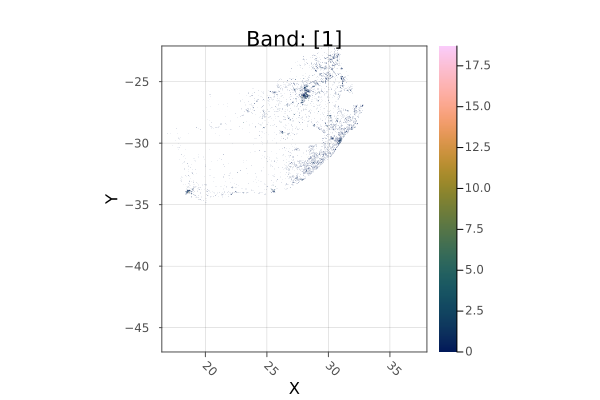

In [7]:
path = "../data/zaf_f_5_2020_constrained.tif"
f_5_zaf = read(Raster(path))
plot(f_5_zaf)

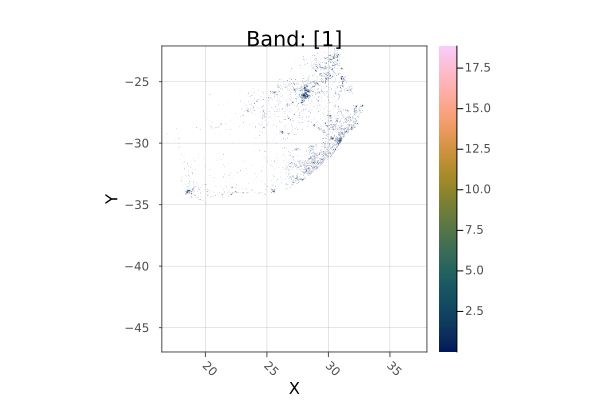

In [18]:
path = "../data/zaf_m_5_2020_constrained.tif"
m_5_zaf = read(Raster(path))
m_5_zaf = replace_missing(m_5_zaf, 0)
plot(m_5_zaf)

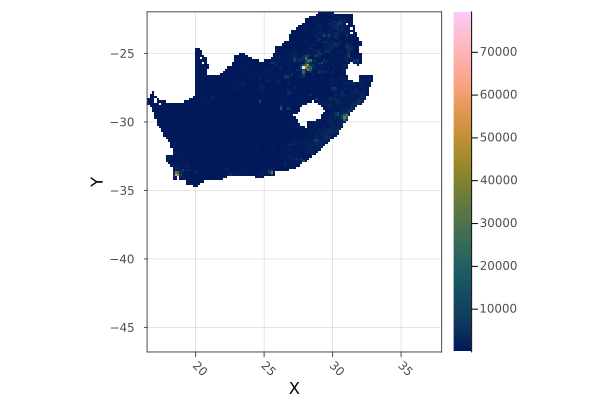

19221

In [54]:
m_5_zaf_agg = Rasters.aggregate(sum, m_5_zaf, 200; skipmissingval=true)
plot(m_5_zaf_agg, fmt=:png) |> display
nr, nc = size(m_5_zaf_agg)
nr*nc

In [98]:
(37.2912 - 16.4579)/129 * 111 # 200 aggregation, 19211 grids -> eventually around 1500-2000
# > 17.92 km 
(37.2912 - 16.4579)/51 * 111 # 500 aggregation, 3009 grids -> eventually around 500-800 
# > 45.34 km 

45.34306470588236

In [91]:
m_5_zaf_agg = Rasters.aggregate(sum, m_5_zaf, 1000; skipmissingval=true)

25×29 Raster{Float32,2} with dimensions: 
  X Projected{Float64} LinRange{Float64}(16.4579, 36.4579, 25) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(-22.1279, -45.4612, 29) ReverseOrdered Regular Intervals crs: WellKnownText
extent: Extent(X = (16.457916616, 37.291249866), Y = (-45.46124961633, -21.29458304633))missingval: 0.0f0crs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
parent:
            -22.1279    -22.9612   …  -43.7946  -44.6279  -45.4612
 16.4579      0.0         0.0           0.0       0.0       0.0
 17.2912      0.0         0.0           0.0       0.0       0.0
 18.1246      0.0         0.0           0.0       0.0       0.0
 18.9579      0.0         0.0           0.0  

In [92]:
m_5_zaf |> sum |> println
m_5_zaf_agg |> sum |> println

2.8521925e6
2.8521772e6


In [93]:
size(m_5_zaf_agg)

(25, 29)

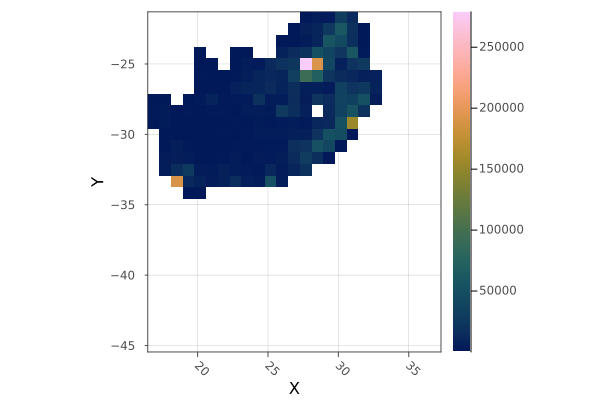

In [94]:
plot(m_5_zaf_agg, fmt=:png)

In [95]:
coords = []
lon = lookup(m_5_zaf_agg, X)
lat = lookup(m_5_zaf_agg, Y)
for lo in lon, la in lat
    push!(coords, (lon=lo, lat=la, value=m_5_zaf_agg[At(lo), At(la)]))
end
df = DataFrame(coords)
first(df, 5) |> display
df |> size

Row,lon,lat,value
,Float64,Float64,Float32
1,16.4579,-22.1279,0.0
2,16.4579,-22.9612,0.0
3,16.4579,-23.7946,0.0
4,16.4579,-24.6279,0.0
5,16.4579,-25.4612,0.0


(725, 3)

In [96]:
df[!, :value] = @pipe df[:, :value] .|> round(_; digits=0)
cond = df[:, :value] .>= 100
df[cond, :value] |> size

(177,)

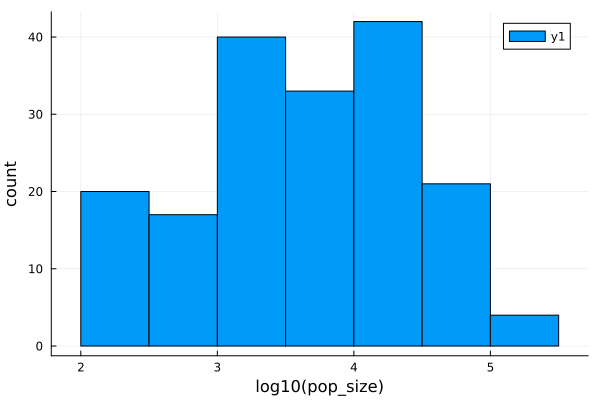

In [97]:
histogram(log10.(df[cond, :value]), ylabel=:count,xlabel="log10(pop_size)")

## Basic usage

In [6]:
lon, lat = X(25:1:30), Y(25:1:30)
ti = Ti(DateTime(2001):Month(1):DateTime(2002))
ras = Raster(rand(lon, lat, ti))

6×6×13 Raster{Float64,3} with dimensions: 
  X Sampled{Int64} 25:1:30 ForwardOrdered Regular Points,
  Y Sampled{Int64} 25:1:30 ForwardOrdered Regular Points,
  Ti Sampled{DateTime} DateTime("2001-01-01T00:00:00"):Month(1):DateTime("2002-01-01T00:00:00") ForwardOrdered Regular Points
extent: Extent(X = (25, 30), Y = (25, 30), Ti = (DateTime("2001-01-01T00:00:00"), DateTime("2002-01-01T00:00:00")))missingval: missingparent:
[:, :, 1]
     25          26         27          28         29          30
 25   0.0746718   0.366524   0.460777    0.764925   0.762806    0.409012
 26   0.324671    0.623459   0.0180161   0.537251   0.0977675   0.284391
 27   0.461749    0.598353   0.946063    0.447291   0.81821     0.171007
 28   0.04748     0.491479   0.375213    0.963389   0.068906    0.84599
 29   0.641787    0.116167   0.133705    0.364848   0.827253    0.535112
 30   0.937028    0.091711   0.223935    0.547886   0.334959    0.366134
[and 12 more slices...]

In [14]:
lon = lookup(ras, X) # if X is longitude
lat = lookup(ras, Y) # if Y is latitude

Sampled{Int64} ForwardOrdered Regular Points
wrapping: 25:1:30

In [23]:
ras[Ti(8)]

6×6 Raster{Float64,2} with dimensions: 
  X Sampled{Int64} 25:1:30 ForwardOrdered Regular Points,
  Y Sampled{Int64} 25:1:30 ForwardOrdered Regular Points
and reference dimensions: 
  Ti Sampled{DateTime} DateTime("2001-08-01T00:00:00"):Month(1):DateTime("2001-08-01T00:00:00") ForwardOrdered Regular Points
extent: Extent(X = (25, 30), Y = (25, 30))missingval: missingparent:
     25         26          27         28          29         30
 25   0.10026    0.799788    0.292552   0.207035    0.819996   0.648788
 26   0.783168   0.118507    0.481609   0.362655    0.484159   0.869644
 27   0.412103   0.286202    0.124219   0.829324    0.514693   0.909391
 28   0.930941   0.231714    0.664986   0.220732    0.058689   0.248065
 29   0.421614   0.0189154   0.518253   0.752881    0.547725   0.691143
 30   0.801994   0.977474    0.969263   0.0977857   0.273259   0.0295789

In [36]:
using Rasters, RasterDataSources, ArchGDAL, Plots

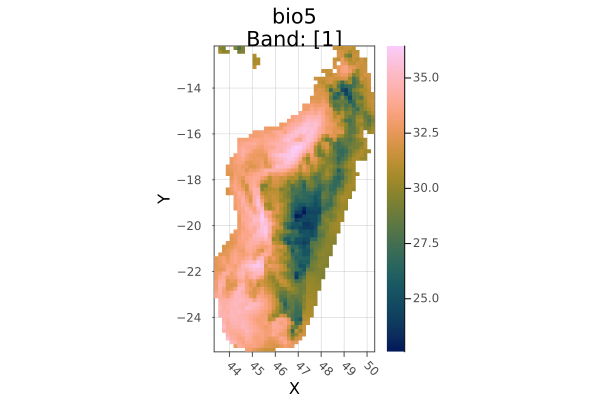

In [37]:
A = Raster(WorldClim{BioClim}, 5)
madagascar = view(A, X(43.25 .. 50.48), Y(-25.61 .. -12.04)) # Note the space between .. -12
plot(madagascar)

62464.594f0

In [6]:
madagascar

42×80 Raster{Float32,2} bio5 with dimensions: 
  X Projected{Float64} LinRange{Float64}(43.3333, 50.1667, 42) ForwardOrdered Regular Intervals crs: WellKnownText,
  Y Projected{Float64} LinRange{Float64}(-12.3333, -25.5, 80) ReverseOrdered Regular Intervals crs: WellKnownText
and reference dimensions: 
  Band Categorical{Int64} 1:1 ForwardOrdered
extent: Extent(X = (43.33333333333334, 50.333333333333336), Y = (-25.5, -12.166666666666677))missingval: -3.4f38crs: GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]
parent:
          -12.3333  -12.5     -12.6667  …  -25.1667  -25.3333  -25.5
 43.3333   -3.4f38   -3.4f38   -3.4f38      -3.4f38   -3.4f38   -3.4f38
 43.5      29.7175   30.5      -3.4f38      -3.4f38   -3.4f38   -3.4f38
 43.6667  

In [7]:
lon = lookup(madagascar, X)

Projected{Float64} ForwardOrdered Regular Intervals crs: WellKnownText
wrapping: 42-element LinRange{Float64, Int64}:
 43.3333,43.5,43.6667,43.8333,44.0,44.1667,…,49.5,49.6667,49.8333,50.0,50.1667

In [39]:
ismissing.(madagascar) |> sum

0

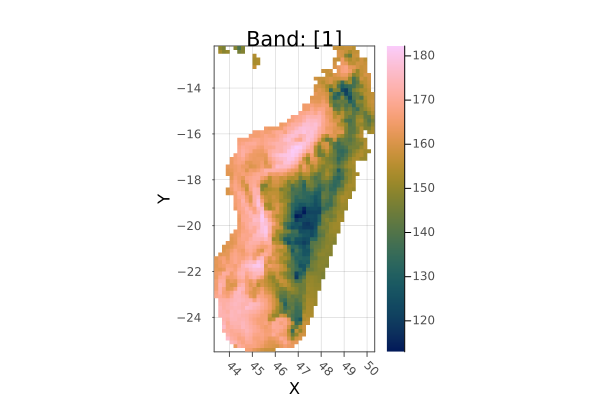

In [34]:
plot(madagascar .* 5)

## Modelling 

In [94]:
lon = lookup(madagascar, X) # if X is longitude
lat = lookup(madagascar, Y) # if Y is latitude

Projected{Float64} ReverseOrdered Regular Intervals crs: WellKnownText
wrapping: 80-element LinRange{Float64, Int64}:
 -12.3333,-12.5,-12.6667,-12.8333,-13.0,…,-25.0,-25.1667,-25.3333,-25.5

In [95]:
lo = lon[20]
la = lat[20]
madagascar[At(lo), At(la)]

33.154957f0

In [96]:
coords = []
for lo in lon, la in lat
    push!(coords, (lon=lo, lat=la, value=madagascar[At(lo), At(la)]))
end
df = DataFrame(coords)
first(df, 5)

Row,lon,lat,value
,Float64,Float64,Float32
1,43.3333,-12.3333,-3.4e38
2,43.3333,-12.5,-3.4e38
3,43.3333,-12.6667,-3.4e38
4,43.3333,-12.8333,-3.4e38
5,43.3333,-13.0,-3.4e38


In [97]:
# This is matrix for corresponding values.
mat = unstack(df, :lon, :lat, :value)[:, 2:end] |> Matrix
nothing

## Aggregate 

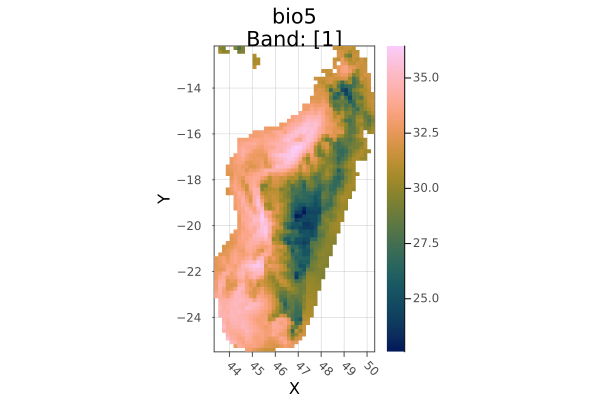

In [44]:
plot(madagascar)

(42, 80)
(7, 20)


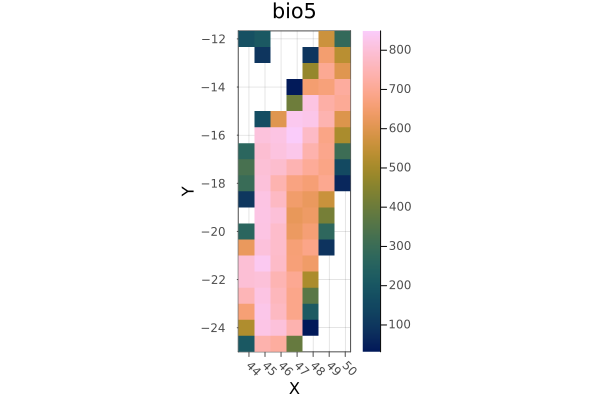

In [49]:
using Rasters: Center
ag = Rasters.aggregate(sum, madagascar, (X(6), Y(4)); skipmissingval=true)
size(madagascar) |> println
size(ag) |> println
plot(ag)

In [50]:
ag[1,1] |> typeof

Float32

In [51]:
replace_missing(madagascar , 0) |> sum |> println
replace_missing(ag, 0) |> sum |> println

62464.594
62464.594


### Data manipulation 

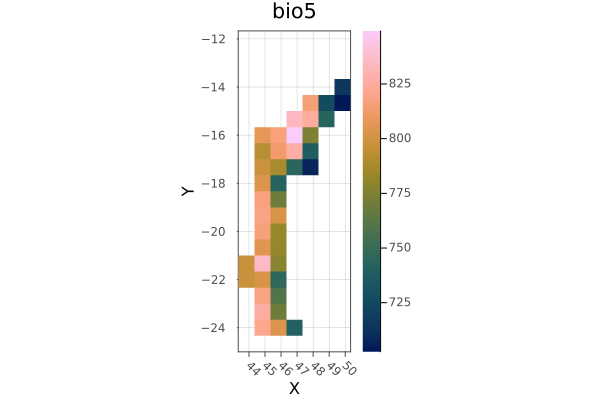

In [136]:
ag_new = ag
ag_new[ag .< 700] .= ag[1,1]
plot(ag_new)